# Survival Analysis Plot
This notebook generates bar plots for different milestones, highlighting incorrect implementations with a red asterisk (*), and ensures the Y-axis extends up to 65 minutes.

KeyError: 'correct folder'

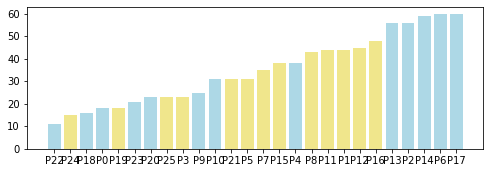

In [ ]:

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "./data/dataBinary_milestones_valid_60_final.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)
#drop outliers computed with dbscam
#df = df[~df['PX'].isin('P3','P15','P20','P22','P23','P24')]
#df = df.query("PX != ['P3','P15','P20','P22','P23','P24']")

# Rename columns for consistency
df.rename(columns={'correct': 'Correct Implementation', 'sound solution': 'correct solution'}, inplace=True)

# Define the column pairs for plotting
column_pairs = [
    ("folder", "right folder"),
    ("file", "right file"),
    ("class", "right class"),
    ("method", "right method"),
    ("line", "right lines"),
    ("solution", "right solution"),
    ("implement", "Correct Implementation")
]

# Set figure size
plt.figure(figsize=(18, 12))

# Loop through each pair of columns to create subplots
for i, (col, correct_col) in enumerate(column_pairs, 1):
    plt.subplot(4, 2, i)  # Arrange plots in a 3x2 grid

    # Sorting dataframe by the first column in the pair
    df_sorted = df.sort_values(by=col)

    # Define colors based on 'group'
    colors = df_sorted['group'].apply(lambda x: 'lightblue' if x == 'Control' else 'khaki')

    # Create bar plot
    bars = plt.bar(df_sorted['PX'], df_sorted[col], color=colors)

    # Add symbols on top where correct column equals 'n'
    for bar, correct_value in zip(bars, df_sorted[correct_col]):
        if correct_value == 'n':
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, '*', 
                     ha='center', va='bottom', color='red', fontsize=12)

    # Set labels and titles
    plt.xlabel('Participants')
    plt.ylabel('Minutes')
    plt.title(f'{col.capitalize()} vs {correct_col.capitalize()}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for clarity

    # Extend y-axis to 65 minutes
    plt.ylim([0, 65])

# Adjust layout
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/survival-multiple-correct-y65.png', format='png')
plt.savefig('./figures/survival-multiple-correct-y65.pdf', format='pdf')

# Show the plot
plt.show()
